In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import hvplot.pandas
import requests
import numpy as np
import json
import os
import csv
from config import geoapify_API

In [2]:
csvpath = os.path.join('Resources', 'Zillow_ZORI.csv')
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    zori_df = pd.DataFrame(csvreader)
    
zori_df.head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2015,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1670.67958,...,2075.255234,2061.137924,2069.625818,2103.173183,2118.118682,2123.200935,2089.117986,2096.496744,2105.715103,2119.451238
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1274.676753,...,1811.10274,1773.456256,1772.820748,1762.328884,1772.942839,1784.288476,1784.750453,1789.217743,1799.360782,1807.361463
3,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,,...,1711.522493,1726.142851,1717.839329,1719.081915,1717.283184,1733.740666,1745.658694,1762.497318,1768.14239,1764.616554
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,,...,1435.609267,1446.655608,1441.710282,1482.989181,1496.340115,1493.516892,1481.837008,1487.743808,1491.369615,1512.230159


In [3]:
new_header = zori_df.iloc[0]
zori_df2 = zori_df[1:]
zori_df2.columns = new_header
zori_df2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2015,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1670.67958,...,2075.255234,2061.137924,2069.625818,2103.173183,2118.118682,2123.200935,2089.117986,2096.496744,2105.715103,2119.451238
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1274.676753,...,1811.10274,1773.456256,1772.820748,1762.328884,1772.942839,1784.288476,1784.750453,1789.217743,1799.360782,1807.361463
3,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,,...,1711.522493,1726.142851,1717.839329,1719.081915,1717.283184,1733.740666,1745.658694,1762.497318,1768.14239,1764.616554
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,,...,1435.609267,1446.655608,1441.710282,1482.989181,1496.340115,1493.516892,1481.837008,1487.743808,1491.369615,1512.230159
5,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,,...,2990.216342,2951.041683,2911.259994,2869.472729,2848.934383,2857.651192,2890.163751,2941.074493,2982.38238,3008.639996


In [4]:
philly_zori = zori_df2.loc[(zori_df2["City"] == 'Philadelphia')&(zori_df2["State"] == 'PA')]
philly_zori = philly_zori.rename(columns={"RegionName":"Zip Code"})
philly_zori = philly_zori.set_index("Zip Code")

philly_zori

,RegionID,SizeRank,RegionType,StateName,State,City,Metro,CountyName,1/31/2015,2/28/2015,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
Zip Code,,,,,,,,,,,,,,,,,,,,,
19120,65787,167,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,,,,,,1186.478292,1208.586422,1157.807666,1172.464868,1198.972222
19124,65791,225,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1104.396878,1077.920716,1087.811847,1098.909977,1121.863944,1139.031373,1127.096374,1143.546272,1144.251601,1142.731481
19111,65779,266,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1271.023328,1256.350628,1283.148899,1251.473313,1292.427228,1269.211134,1296.064995,1299.598045,1325.335635,1310.416667
19143,65810,327,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1342.881472,1365.958781,1363.248491,1387.737944,1386.753456,1395.935299,1401.076014,1402.60735,1384.795708,1380.292929
19149,65816,421,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1383.592341,1405.384612,1414.238179,1444.317879,1416.94358,1427.4698,1439.241129,1475.86269,1482.087666,1475.833333
19134,65801,479,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1317.299537,1309.441394,1292.240919,1263.694624,1284.268172,1300.591101,1340.252594,1352.527859,1343.720991,1345.09127
19140,65807,791,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1162.362295,1163.029416,1153.368967,1138.515548,1142.308436,1158.983082,1157.726577,1148.348103,1145.06773,1164.130952
19148,65815,924,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,,,...,1631.167209,1631.872083,1627.663079,1605.268492,1619.483369,1607.307318,1633.929965,1624.986155,1649.265856,1651.822169
19104,65772,936,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,1113.45801,1113.291366,...,1556.088072,1601.552662,1578.928327,1565.327146,1555.126886,1583.83008,1605.073689,1616.244437,1614.688314,1609.670383


In [5]:
philly_crime2_url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM arrests_zipcode'
philly_crime2 = requests.get(philly_crime2_url).json()
philly_crime2 = pd.DataFrame(philly_crime2['rows'])
philly_crime_23 = philly_crime2.loc[(philly_crime2['day'].str.startswith('2023'))&(philly_crime2['zip_code'] != 'Unknown'),'zip_code']

philly_crime_23

36293     19114
36294     19148
36295     19103
36296     19103
36297     19107
          ...  
376810    19121
376811    19131
376812    19131
376813    19144
376814    19149
Name: zip_code, Length: 10202, dtype: object

In [6]:
philly_crime_counts = pd.DataFrame(philly_crime_23.value_counts())
philly_crime_counts = philly_crime_counts.rename(columns={'zip_code':'offense_count'})
philly_crime_counts.head()

,offense_count
19134,1274
19140,655
19124,578
19132,490
19133,471


In [7]:
philly_crime_counts['lat'] = ''
philly_crime_counts['lon'] = ''
for index, row in philly_crime_counts.iterrows():
    zipcode = index
    zipcodeurl = f'https://api.geoapify.com/v1/geocode/search?text={zipcode}&lang=en&limit=10&type=postcode&filter=countrycode:us&apiKey={geoapify_API}'
    zipcodecoords = requests.get(zipcodeurl).json()
    try:
        lat = zipcodecoords['features'][0]['properties']['lat']
        lon = zipcodecoords['features'][0]['properties']['lon']
        philly_crime_counts.loc[index,'lat'] = lat
        philly_crime_counts.loc[index,'lon'] = lon
    except:
        print('Bad item')
        lat = ''
        lon = ''
        pass
    

philly_crime_counts.head()


,offense_count,lat,lon
19134,1274,39.992856,-75.111306
19140,655,40.009617,-75.146059
19124,578,40.015233,-75.088785
19132,490,39.993518,-75.164946
19133,471,39.988752,-75.142044


In [8]:
philly2_combined = pd.merge(philly_crime_counts,philly_zori,how='left', right_on = 'Zip Code',left_index=True)
philly2_combined = philly2_combined.dropna()

philly2_combined = philly2_combined.rename(columns={"7/31/2023":"ZORI"})

philly2_combined.head()

/var/folders/h7/bxg17x4j6zq983g2jybk3dqw0000gp/T/ipykernel_99099/1858038918.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  philly2_combined = pd.merge(philly_crime_counts,philly_zori,how='left', right_on = 'Zip Code',left_index=True)


,Zip Code,offense_count,lat,lon,RegionID,SizeRank,RegionType,StateName,State,City,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,ZORI
19134,19134,1274,39.992856,-75.111306,65801,479,zip,PA,PA,Philadelphia,...,1317.299537,1309.441394,1292.240919,1263.694624,1284.268172,1300.591101,1340.252594,1352.527859,1343.720991,1345.09127
19140,19140,655,40.009617,-75.146059,65807,791,zip,PA,PA,Philadelphia,...,1162.362295,1163.029416,1153.368967,1138.515548,1142.308436,1158.983082,1157.726577,1148.348103,1145.06773,1164.130952
19124,19124,578,40.015233,-75.088785,65791,225,zip,PA,PA,Philadelphia,...,1104.396878,1077.920716,1087.811847,1098.909977,1121.863944,1139.031373,1127.096374,1143.546272,1144.251601,1142.731481
19132,19132,490,39.993518,-75.164946,65799,2819,zip,PA,PA,Philadelphia,...,1272.751678,1316.611466,1326.440316,1347.239668,1302.849854,1297.46476,1307.167776,1293.333186,1252.728585,1239.897817
19133,19133,471,39.988752,-75.142044,65800,4786,zip,PA,PA,Philadelphia,...,1384.472489,1437.188218,1431.95629,1482.037362,1484.864799,1507.711998,1511.285435,1468.304353,1487.726198,1493.994048


In [9]:
philly2_combined['ZORI'] = philly2_combined['ZORI'].astype('float')
philly2_combined['color'] = ''
philly2_combined['size'] = 0

for index,row in philly2_combined.iterrows():
    philly2_combined['size'] = philly2_combined['offense_count']*2
    if (philly2_combined.loc[index,'ZORI'] < 1200):
        philly2_combined.loc[index,'color'] = 'red'
    elif (philly2_combined.loc[index,'ZORI'] >= 1200)&(philly2_combined.loc[index,'ZORI'] < 1350):
        philly2_combined.loc[index,'color'] = 'orange'
    elif (philly2_combined.loc[index,'ZORI'] >= 1350)&(philly2_combined.loc[index,'ZORI'] < 1500):
        philly2_combined.loc[index,'color'] = 'gold'
    elif (philly2_combined.loc[index,'ZORI'] >= 1500)&(philly2_combined.loc[index,'ZORI'] < 1650):
        philly2_combined.loc[index,'color'] = 'yellow'
    elif (philly2_combined.loc[index,'ZORI'] >= 1650)&(philly2_combined.loc[index,'ZORI'] < 1800):
        philly2_combined.loc[index,'color'] = 'skyblue'
    elif (philly2_combined.loc[index,'ZORI'] >= 1800)&(philly2_combined.loc[index,'ZORI'] < 1950):
        philly2_combined.loc[index,'color'] = 'dodgerblue'
    elif (philly2_combined.loc[index,'ZORI'] >= 1950):
        philly2_combined.loc[index,'color'] = 'blue'

In [10]:
philly2_combined

,Zip Code,offense_count,lat,lon,RegionID,SizeRank,RegionType,StateName,State,City,...,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,ZORI,color,size
19134,19134,1274,39.992856,-75.111306,65801,479,zip,PA,PA,Philadelphia,...,1292.240919,1263.694624,1284.268172,1300.591101,1340.252594,1352.527859,1343.720991,1345.091270,orange,2548
19140,19140,655,40.009617,-75.146059,65807,791,zip,PA,PA,Philadelphia,...,1153.368967,1138.515548,1142.308436,1158.983082,1157.726577,1148.348103,1145.06773,1164.130952,red,1310
19124,19124,578,40.015233,-75.088785,65791,225,zip,PA,PA,Philadelphia,...,1087.811847,1098.909977,1121.863944,1139.031373,1127.096374,1143.546272,1144.251601,1142.731481,red,1156
19132,19132,490,39.993518,-75.164946,65799,2819,zip,PA,PA,Philadelphia,...,1326.440316,1347.239668,1302.849854,1297.46476,1307.167776,1293.333186,1252.728585,1239.897817,orange,980
19133,19133,471,39.988752,-75.142044,65800,4786,zip,PA,PA,Philadelphia,...,1431.95629,1482.037362,1484.864799,1507.711998,1511.285435,1468.304353,1487.726198,1493.994048,gold,942
19143,19143,445,39.94327,-75.222942,65810,327,zip,PA,PA,Philadelphia,...,1363.248491,1387.737944,1386.753456,1395.935299,1401.076014,1402.60735,1384.795708,1380.292929,gold,890
19139,19139,440,39.961015,-75.221072,65806,1349,zip,PA,PA,Philadelphia,...,1314.817916,1344.90419,1326.328084,1334.732789,1340.333394,1350.25057,1354.450034,1347.362434,orange,880
19120,19120,336,40.028971,-75.121499,65787,167,zip,PA,PA,Philadelphia,...,,,,1186.478292,1208.586422,1157.807666,1172.464868,1198.972222,red,672
19121,19121,329,39.978775,-75.170031,65788,2502,zip,PA,PA,Philadelphia,...,1617.238567,1637.101843,1625.410746,1654.877911,1670.256288,1687.146065,1653.037756,1637.899331,yellow,658
19104,19104,306,39.957497,-75.197276,65772,936,zip,PA,PA,Philadelphia,...,1578.928327,1565.327146,1555.126886,1583.83008,1605.073689,1616.244437,1614.688314,1609.670383,yellow,612


In [11]:
zori_crime_map = philly2_combined.hvplot.points(
    "lon","lat",
    geo = True,tiles = "CartoDark",
    frame_width = 750,frame_height = 600,
    size = 'size',color='color',
    hover_cols=['Zip Code','offense_count','ZORI']
)

In [12]:
zori_crime_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]   (color,size,Zip Code,offense_count,ZORI)

In [14]:
# hvplot.save(zori_crime_map,"Results/ZORI_Crime_Map.png")

In [15]:
topzips = philly2_combined.sort_values(by='ZORI',ascending=False)
topzips.head()
top = ['19127','19102','19106','19103','19123']
topzips.tail()
bot = ['19142','19120','19140','19124','19141']

In [16]:
timepoints = list(zori_df.loc[0,np.arange(33,110,6)])

In [17]:
timezillow = zori_df.loc[(zori_df[6] == 'Philadelphia')&(zori_df[5] == 'PA'),2:]
timezillow.replace('','NaN',inplace=True)
timezillow = timezillow.set_index(2)

timezillowtop,timezillowbot = timezillow.loc[top,33:110].astype('float'),timezillow.loc[bot,33:110].astype('float')
timezillowtop,timezillowbot = timezillowtop.T,timezillowbot.T
timezillowtop,timezillowbot = timezillowtop.reset_index(drop=True),timezillowbot.reset_index(drop=True)

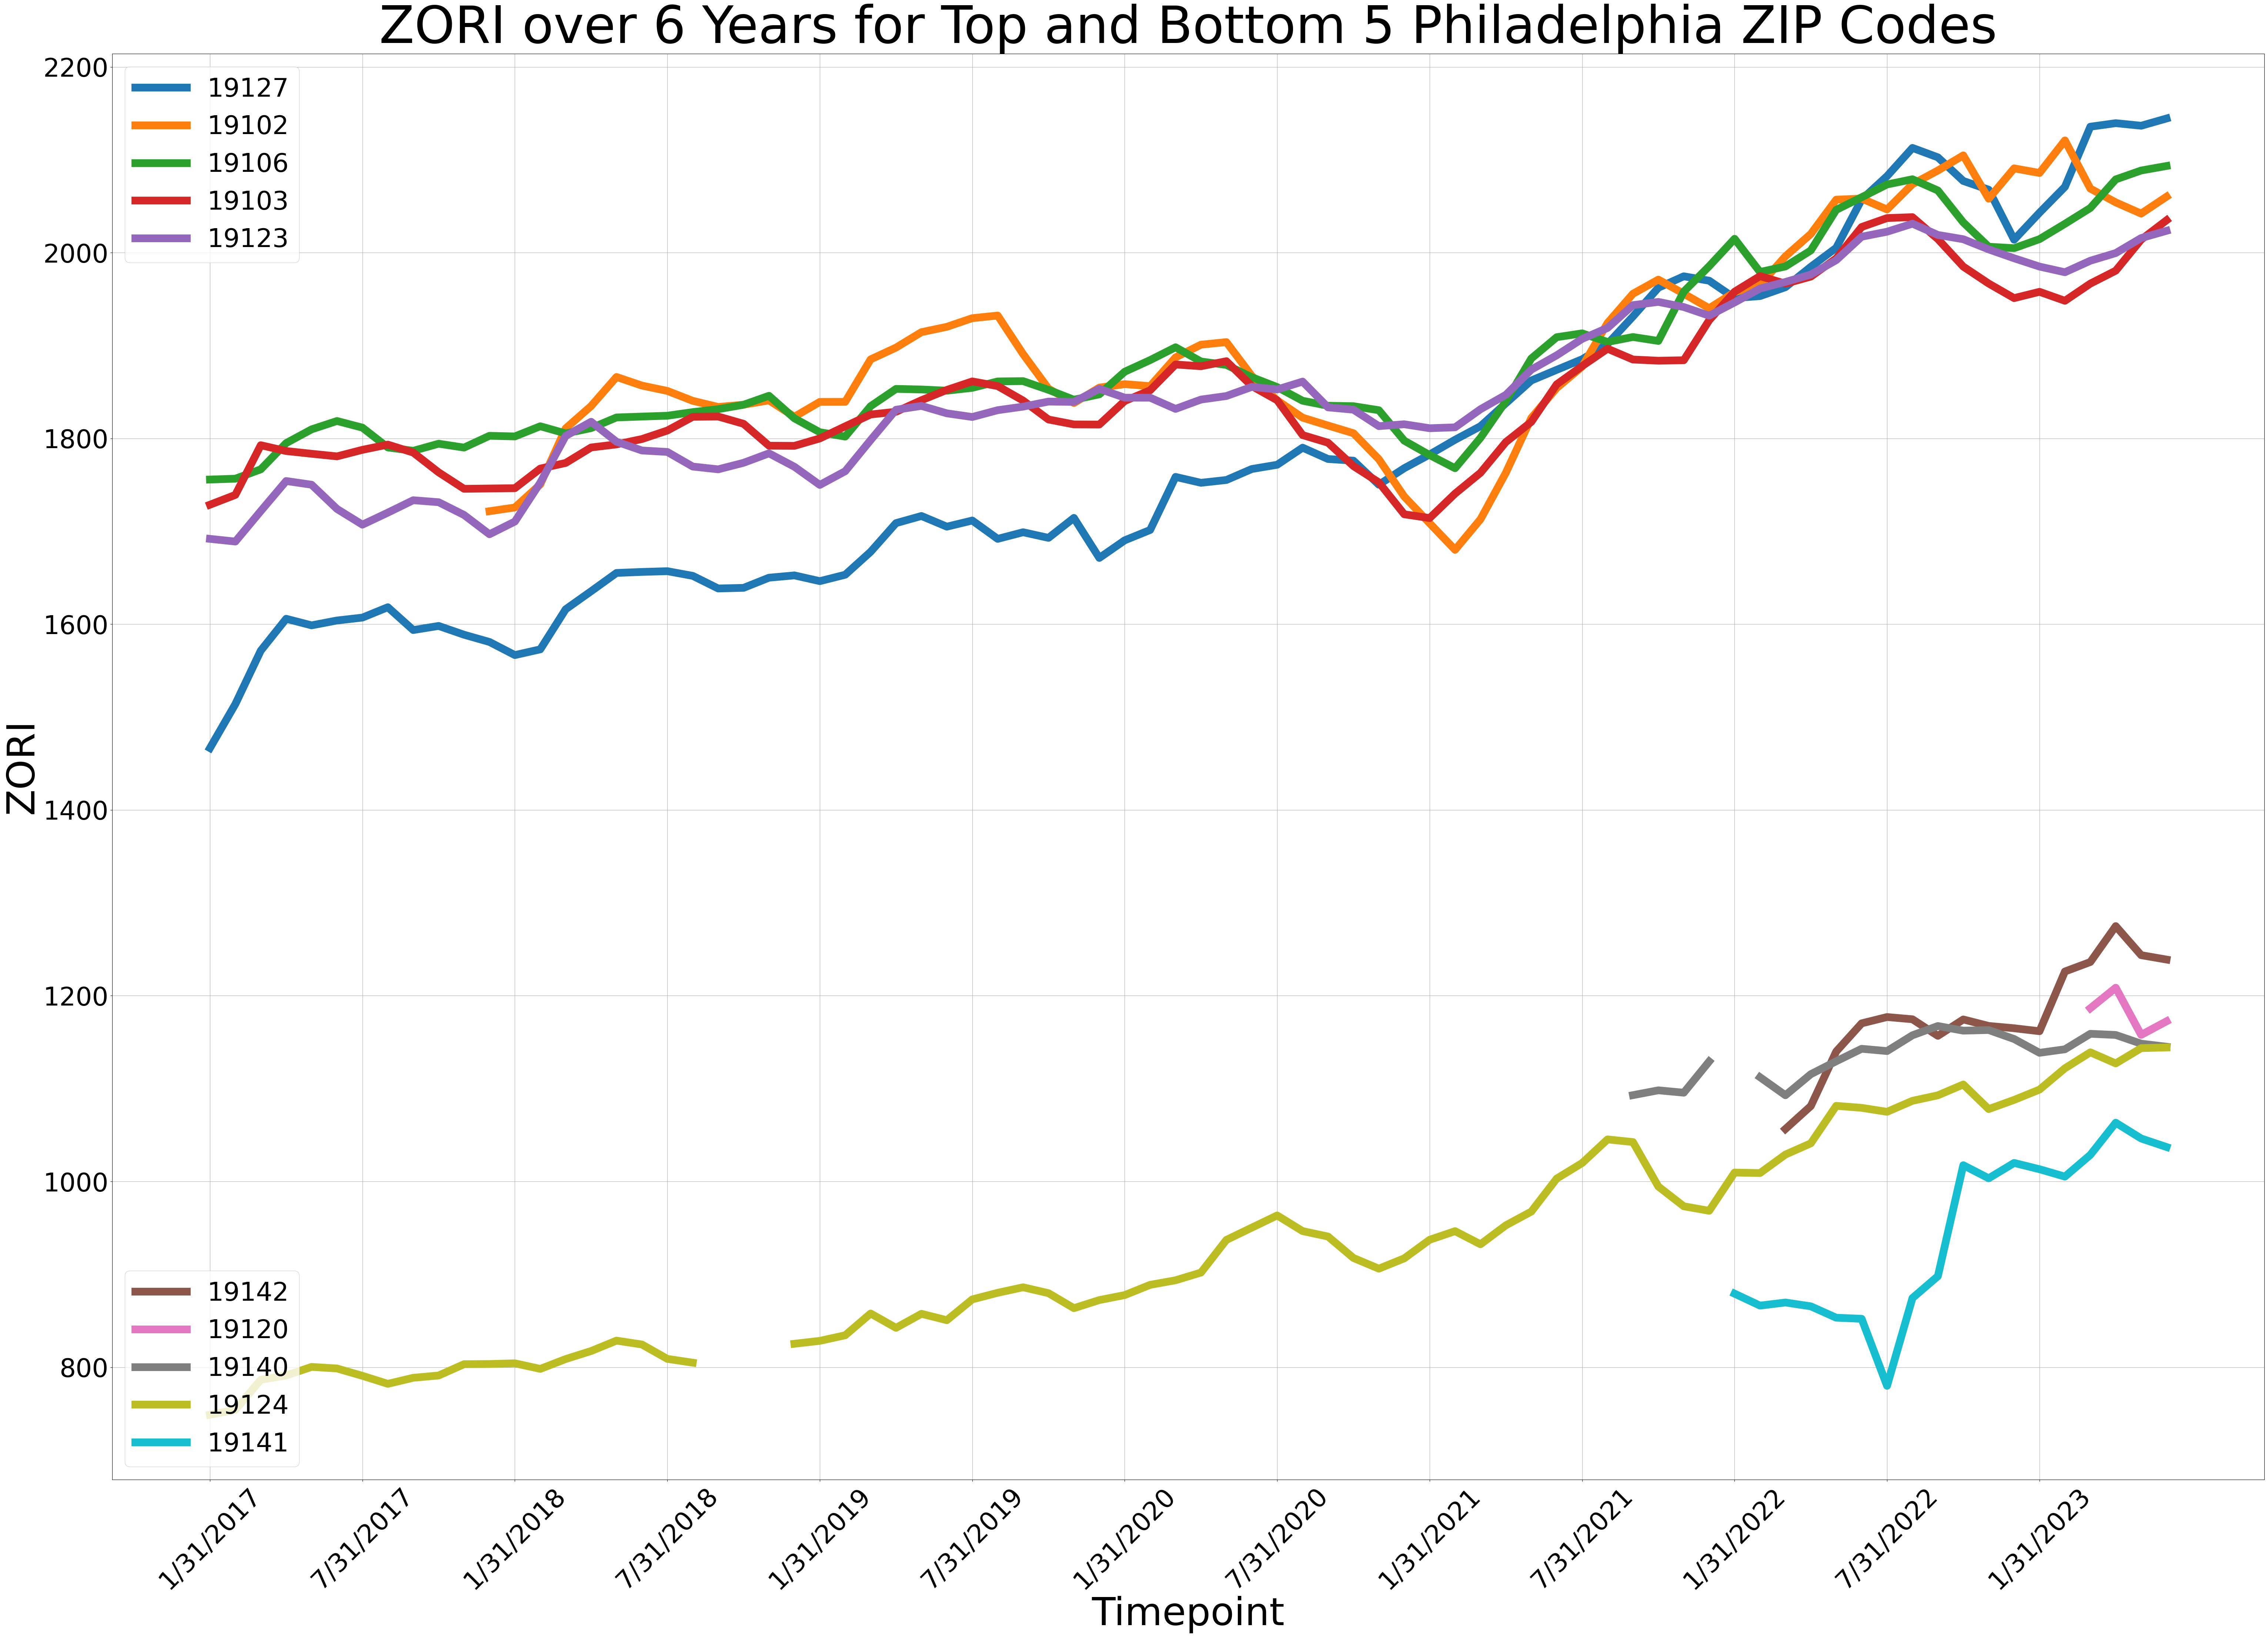

In [18]:
fig,ax = plt.subplots(figsize=(75,50))

h1 = plt.plot(timezillowtop,linewidth=15)
h2 = plt.plot(timezillowbot,linewidth=15)

plt.title('ZORI over 6 Years for Top and Bottom 5 Philadelphia ZIP Codes',fontsize=100)
plt.grid()
ax.legend(top,loc="best",fontsize=50)
leg = Legend(ax,h2,labels=bot,loc="lower left",fontsize=50)
ax.add_artist(leg)
plt.xlabel('Timepoint',fontsize=75)
plt.xticks(np.arange(0,77,6),timepoints,rotation=45,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('ZORI',fontsize=75)

plt.savefig('zori_vs_time')
plt.savefig("Results/ZORI_Over_Time.png")
plt.show()

In [19]:
top = ['19127','19102','19106','19103','19123']

philly_crime2_url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM arrests_zipcode'
philly_crime2 = requests.get(philly_crime2_url).json()
philly_crime2 = pd.DataFrame(philly_crime2['rows'])

#2023 top zips
philly_crime_23_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2023'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_23_top = pd.DataFrame(philly_crime_23_top.value_counts())




#2022 top zips
philly_crime_22_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2022'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_22_top = pd.DataFrame(philly_crime_22_top.value_counts())




#2021 top zips
philly_crime_21_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2021'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_21_top = pd.DataFrame(philly_crime_21_top.value_counts())




#2020 top zips
philly_crime_20_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2020'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_20_top = pd.DataFrame(philly_crime_20_top.value_counts())




#2019 top zips
philly_crime_19_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2019'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_19_top = pd.DataFrame(philly_crime_19_top.value_counts())




#2018 top zips
philly_crime_18_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2018'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_18_top = pd.DataFrame(philly_crime_18_top.value_counts())




#2017 top zips
philly_crime_17_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2017'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_17_top = pd.DataFrame(philly_crime_17_top.value_counts())




#2016 top zips
philly_crime_16_top = philly_crime2.loc[(philly_crime2['day'].str.startswith('2016'))&((philly_crime2['zip_code'] == '19127') 
                                       | (philly_crime2['zip_code'] == '19102') | (philly_crime2['zip_code'] == '19106') | 
                                                                                      (philly_crime2['zip_code'] == '19103') 
                                                                                      | (philly_crime2['zip_code'] == '19123')),'zip_code']
philly_crime_16_top = pd.DataFrame(philly_crime_16_top.value_counts())



In [20]:
print(philly_crime_23_top.sum())
print(philly_crime_22_top.sum())
print(philly_crime_21_top.sum())
print(philly_crime_20_top.sum())
print(philly_crime_19_top.sum())
print(philly_crime_18_top.sum())
print(philly_crime_17_top.sum())
print(philly_crime_16_top.sum())

zip_code    446
dtype: int64
zip_code    745
dtype: int64
zip_code    596
dtype: int64
zip_code    778
dtype: int64
zip_code    1137
dtype: int64
zip_code    1143
dtype: int64
zip_code    1194
dtype: int64
zip_code    1150
dtype: int64


In [21]:
philly_crime_23_top = philly_crime_23_top.sum()
philly_crime_22_top = philly_crime_22_top.sum()
philly_crime_21_top = philly_crime_21_top.sum()
philly_crime_20_top = philly_crime_20_top.sum()
philly_crime_19_top = philly_crime_19_top.sum()
philly_crime_18_top = philly_crime_18_top.sum()
philly_crime_17_top = philly_crime_17_top.sum()
philly_crime_16_top = philly_crime_16_top.sum()

print(philly_crime_16_top)

zip_code    1150
dtype: int64


In [22]:
top_zips_crime_totals = pd.DataFrame.from_dict({"2016": philly_crime_16_top, 
                                                "2017": philly_crime_17_top, 
                                                "2018": philly_crime_18_top, 
                                                "2019": philly_crime_19_top, 
                                                "2020": philly_crime_20_top, 
                                                "2021": philly_crime_21_top, 
                                                "2022": philly_crime_22_top, 
                                                "2023": philly_crime_23_top
                                               })
top_zips_crime_totals = top_zips_crime_totals.T
top_zips_crime_totals = top_zips_crime_totals.rename(columns={'zip_code':'top zips'})
top_zips_crime_totals

,top zips
2016,1150
2017,1194
2018,1143
2019,1137
2020,778
2021,596
2022,745
2023,446


In [23]:
bottom = ['19142','19120','19140','19124','19141']

philly_crime2_url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM arrests_zipcode'
philly_crime2 = requests.get(philly_crime2_url).json()
philly_crime2 = pd.DataFrame(philly_crime2['rows'])

#2023 bottom zips
philly_crime_23_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2023'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_23_bottom = pd.DataFrame(philly_crime_23_bottom.value_counts())




#2022 bottom zips
philly_crime_22_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2022'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_22_bottom = pd.DataFrame(philly_crime_22_bottom.value_counts())




#2021 bottom zips
philly_crime_21_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2021'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_21_bottom = pd.DataFrame(philly_crime_21_bottom.value_counts())




#2020 bottom zips
philly_crime_20_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2020'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_20_bottom = pd.DataFrame(philly_crime_20_bottom.value_counts())




#2019 bottom zips
philly_crime_19_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2019'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_19_bottom = pd.DataFrame(philly_crime_19_bottom.value_counts())




#2018 bottom zips
philly_crime_18_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2018'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_18_bottom = pd.DataFrame(philly_crime_18_bottom.value_counts())




#2017 bottom zips
philly_crime_17_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2017'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_17_bottom = pd.DataFrame(philly_crime_17_bottom.value_counts())




#2016 bottom zips
philly_crime_16_bottom = philly_crime2.loc[(philly_crime2['day'].str.startswith('2016'))&((philly_crime2['zip_code'] == '19142') 
                                       | (philly_crime2['zip_code'] == '19120') | (philly_crime2['zip_code'] == '19140') | 
                                                                                      (philly_crime2['zip_code'] == '19124') 
                                                                                      | (philly_crime2['zip_code'] == '19141')),'zip_code']
philly_crime_16_bottom = pd.DataFrame(philly_crime_16_bottom.value_counts())



In [24]:
print(philly_crime_23_bottom.sum())
print(philly_crime_22_bottom.sum())
print(philly_crime_21_bottom.sum())
print(philly_crime_20_bottom.sum())
print(philly_crime_19_bottom.sum())
print(philly_crime_18_bottom.sum())
print(philly_crime_17_bottom.sum())
print(philly_crime_16_bottom.sum())

zip_code    2026
dtype: int64
zip_code    3323
dtype: int64
zip_code    3733
dtype: int64
zip_code    4046
dtype: int64
zip_code    5616
dtype: int64
zip_code    5180
dtype: int64
zip_code    5784
dtype: int64
zip_code    5689
dtype: int64


In [25]:
philly_crime_23_bottom = philly_crime_23_bottom.sum()
philly_crime_22_bottom = philly_crime_22_bottom.sum()
philly_crime_21_bottom = philly_crime_21_bottom.sum()
philly_crime_20_bottom = philly_crime_20_bottom.sum()
philly_crime_19_bottom = philly_crime_19_bottom.sum()
philly_crime_18_bottom = philly_crime_18_bottom.sum()
philly_crime_17_bottom = philly_crime_17_bottom.sum()
philly_crime_16_bottom = philly_crime_16_bottom.sum()

print(philly_crime_16_bottom)

zip_code    5689
dtype: int64


In [26]:
bottom_zips_crime_totals = pd.DataFrame.from_dict({"2016": philly_crime_16_bottom, 
                                                "2017": philly_crime_17_bottom, 
                                                "2018": philly_crime_18_bottom, 
                                                "2019": philly_crime_19_bottom, 
                                                "2020": philly_crime_20_bottom, 
                                                "2021": philly_crime_21_bottom, 
                                                "2022": philly_crime_22_bottom, 
                                                "2023": philly_crime_23_bottom
                                               })
bottom_zips_crime_totals = bottom_zips_crime_totals.T
bottom_zips_crime_totals = bottom_zips_crime_totals.rename(columns={'zip_code':'bottom zips'})
bottom_zips_crime_totals

,bottom zips
2016,5689
2017,5784
2018,5180
2019,5616
2020,4046
2021,3733
2022,3323
2023,2026


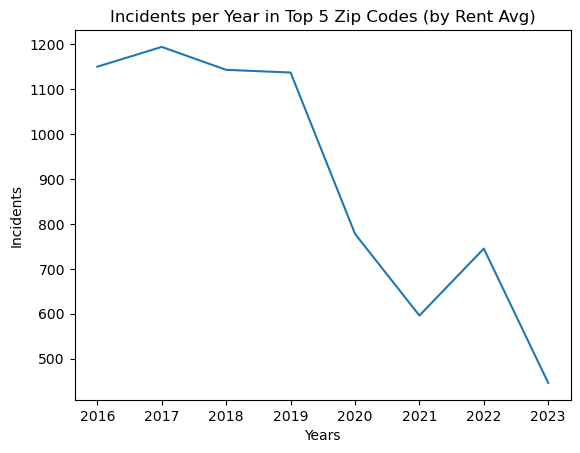

In [27]:
top_zips_crime_totals.plot(y=[0], legend=False)
plt.xlabel("Years")
plt.ylabel("Incidents")
plt.title("Incidents per Year in Top 5 Zip Codes (by Rent Avg)")
plt.savefig("Results/Crime_Over_Time-TopZips")

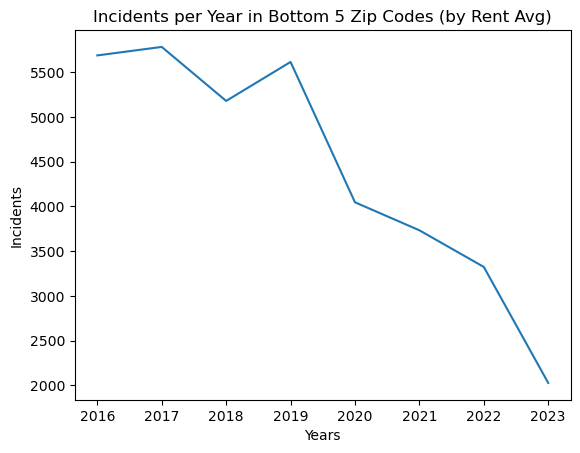

In [28]:
bottom_zips_crime_totals.plot(y=[0], legend=False)
plt.xlabel("Years")
plt.ylabel("Incidents")
plt.title("Incidents per Year in Bottom 5 Zip Codes (by Rent Avg)")
plt.savefig("Results/Crime_Over_Time-BottomZips")

In [29]:
combined_crime_totals = pd.merge(bottom_zips_crime_totals,top_zips_crime_totals, left_index=True, right_index=True)
combined_crime_totals

,bottom zips,top zips
2016,5689,1150
2017,5784,1194
2018,5180,1143
2019,5616,1137
2020,4046,778
2021,3733,596
2022,3323,745
2023,2026,446


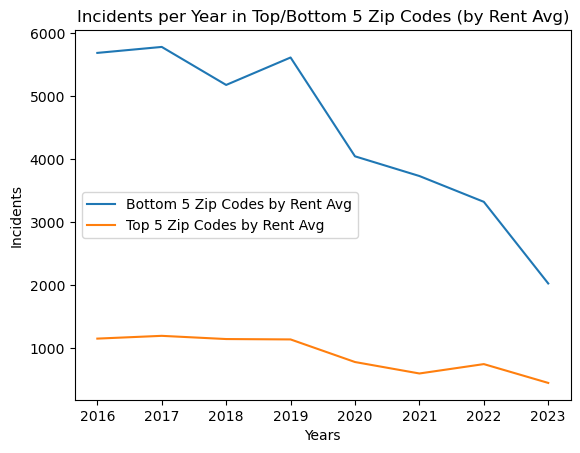

In [30]:
y1 = combined_crime_totals['bottom zips']
x1 = combined_crime_totals.index

plt.plot(x1,y1,label='Bottom 5 Zip Codes by Rent Avg')


y2 = combined_crime_totals['top zips']
x2 = combined_crime_totals.index

plt.plot(x2,y2,label='Top 5 Zip Codes by Rent Avg')


plt.xlabel("Years")
plt.ylabel("Incidents")
plt.title("Incidents per Year in Top/Bottom 5 Zip Codes (by Rent Avg)")

plt.legend()
plt.show()


In [32]:
plt.savefig("Results/Crime_Over_Time-CombinedZips")

<Figure size 640x480 with 0 Axes>